# Optimization

### Resources
- https://github.com/automl/auto-sklearn/issues/1684

## Install auto-sklearn

In [1]:
# 1. uninstall all affected packages
!pip uninstall -y Cython scipy pyparsing scikit_learn imbalanced-learn mlxtend yellowbrick

Found existing installation: Cython 3.0.10
Uninstalling Cython-3.0.10:
  Successfully uninstalled Cython-3.0.10
Found existing installation: scipy 1.11.4
Uninstalling scipy-1.11.4:
  Successfully uninstalled scipy-1.11.4
Found existing installation: pyparsing 3.1.2
Uninstalling pyparsing-3.1.2:
  Successfully uninstalled pyparsing-3.1.2
Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
Found existing installation: imbalanced-learn 0.10.1
Uninstalling imbalanced-learn-0.10.1:
  Successfully uninstalled imbalanced-learn-0.10.1
Found existing installation: mlxtend 0.22.0
Uninstalling mlxtend-0.22.0:
  Successfully uninstalled mlxtend-0.22.0
Found existing installation: yellowbrick 1.5
Uninstalling yellowbrick-1.5:
  Successfully uninstalled yellowbrick-1.5


In [2]:
# 2. install packages to be downgraded
!pip install Cython==0.29.36 scipy==1.9 pyparsing==2.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 35.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.7.14 requires scikit-learn, which is not installed.
librosa 0.10.1 requires scikit-learn>=0.20.0, which is not installed.
qudida 0.0.4 requires scikit-learn>=0.19.1, which is not installed.
sklearn-pandas 2.2.0 requires scikit-learn>=0.23.0, which is not installed.
httplib2 0.22.0 requires pyparsing!=3.0.0,!=3.0.1,!=3.0.2,!=3.0.3,<4,>=2.4.2; py

In [1]:
# 3. install older scikit-learn disregarding its dependencies
!pip install scikit-learn==0.24.2 --no-build-isolation

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 20.9 MB/s eta 0:00:00
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-learn: filename=scikit_learn-0.24.2-cp310-cp310-linux_x86_64.whl size=22237929 sha256=665c76633a8e728a9d3f6b9ac155f4c2b9792afc4f8cdd7c4d77ec4b4521a6bc
  Stored in directory: /root/.cache/pip/wheels/13/a4/68/4e78865652fa14db4a162b491e5138565f97646f9e1f2ab8cc
Successfully built scikit-learn
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.2.0 requires scikit-learn>=1.2.2, but you have scikit-learn 0.24.2 which is incompatible.


In [2]:
# 4. finally install auto-sklearn
!pip install auto-sklearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 19.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 30.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.9/260.9 kB 23.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 4.0 MB/s eta 0:00:00
  Created wheel for auto-sklearn: filename=auto_sklearn-0.15.0-py3-none-any.whl size=6641936 sha256=72b15d43e579bed667bcd43e85a1b95701ab9b8a5a3d900244a66573a0fa2b36
  Stored in directory: /root/.cache/pip/wheels/4d/0a/f9/8c1a06bcc36bc16b467b044b5bb03a90f92a5c5e6cd443414b
  Created wheel for pynisher: filename=pynisher-0.6.4-py3-none-any.whl

In [3]:
# 5. then, try loading the package repeatedly until trash in its dependencies are clean
#import autosklearn

## Setup

In [1]:
from google.colab import drive
import numpy as np
import pandas as pd
import autosklearn.classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/MyDrive/land_cover_classification_kaza

/content/drive/MyDrive/land_cover_classification_kaza


## Load train and test set

In [4]:
train = pd.read_csv('data/train.csv')
train

,B11_Q1,B11_Q2,B11_Q3,B11_Q4,B12_Q1,B12_Q2,B12_Q3,B12_Q4,B2_Q1,B2_Q2,...,NDVI_Q3,NDWI_MCF_Q3,NDWI_GAO_Q3,SAVI_Q3,EVI_Q3,NDVI_Q4,NDWI_MCF_Q4,NDWI_GAO_Q4,SAVI_Q4,EVI_Q4
0,1676.5,1855.5,2356.0,2994.0,843.5,1048.5,1518.0,2345.0,328.0,432.0,...,0.341223,-0.455064,0.146712,0.511750,0.721234,0.346628,-0.430530,-0.010558,0.519865,0.832160
1,1682.0,1729.5,2152.0,2983.0,836.0,994.5,1518.0,1958.0,263.0,320.0,...,0.427598,-0.466317,0.049468,0.641260,1.078874,0.525872,-0.533253,0.128616,0.788690,1.418831
2,1927.5,2226.0,2146.0,3504.0,968.0,1262.5,1428.0,2341.0,293.0,420.0,...,0.466993,-0.495726,0.190476,0.700367,1.177351,0.499757,-0.563277,0.136640,0.749544,1.123387
3,1901.0,1937.0,2234.0,2910.0,1017.5,1129.0,1385.0,1951.0,345.0,385.0,...,0.419711,-0.501458,0.195936,0.629457,0.952158,0.530376,-0.591069,0.162481,0.795451,1.236495
4,1879.5,2026.5,2349.0,2888.0,919.5,1134.0,1435.0,2343.0,303.0,373.5,...,0.442693,-0.499628,0.167875,0.663921,1.061673,0.387115,-0.467694,0.027599,0.580591,0.902442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3300,2955.5,2885.5,3179.0,3912.0,2391.0,2294.0,2725.0,3652.0,626.0,692.0,...,0.193269,-0.327283,-0.076012,0.289866,0.395575,0.176161,-0.269631,-0.152778,0.264213,0.494465
3301,2932.0,3434.0,3763.0,4097.0,2127.0,2967.5,3378.0,3772.0,953.0,1104.0,...,0.124567,-0.307847,-0.130144,0.186831,0.247423,0.137538,-0.347435,-0.114987,0.206287,0.250000
3302,2685.0,3169.0,3626.0,3953.5,2078.0,2625.5,3170.0,3640.0,1102.0,1127.0,...,0.172291,-0.296024,-0.091222,0.258408,0.343363,0.156879,-0.279814,-0.137856,0.235294,0.308250
3303,1352.0,3222.0,3534.0,3774.0,704.0,3107.5,3353.0,3469.0,281.0,1115.0,...,0.168149,-0.283480,-0.121592,0.252196,0.426926,0.160305,-0.268532,-0.146208,0.240431,0.388466


In [5]:
X_train = train.drop(['LC_Nr', 'LC_Out', 'Landcover'], axis=1)
X_train

,B11_Q1,B11_Q2,B11_Q3,B11_Q4,B12_Q1,B12_Q2,B12_Q3,B12_Q4,B2_Q1,B2_Q2,...,NDVI_Q3,NDWI_MCF_Q3,NDWI_GAO_Q3,SAVI_Q3,EVI_Q3,NDVI_Q4,NDWI_MCF_Q4,NDWI_GAO_Q4,SAVI_Q4,EVI_Q4
0,1676.5,1855.5,2356.0,2994.0,843.5,1048.5,1518.0,2345.0,328.0,432.0,...,0.341223,-0.455064,0.146712,0.511750,0.721234,0.346628,-0.430530,-0.010558,0.519865,0.832160
1,1682.0,1729.5,2152.0,2983.0,836.0,994.5,1518.0,1958.0,263.0,320.0,...,0.427598,-0.466317,0.049468,0.641260,1.078874,0.525872,-0.533253,0.128616,0.788690,1.418831
2,1927.5,2226.0,2146.0,3504.0,968.0,1262.5,1428.0,2341.0,293.0,420.0,...,0.466993,-0.495726,0.190476,0.700367,1.177351,0.499757,-0.563277,0.136640,0.749544,1.123387
3,1901.0,1937.0,2234.0,2910.0,1017.5,1129.0,1385.0,1951.0,345.0,385.0,...,0.419711,-0.501458,0.195936,0.629457,0.952158,0.530376,-0.591069,0.162481,0.795451,1.236495
4,1879.5,2026.5,2349.0,2888.0,919.5,1134.0,1435.0,2343.0,303.0,373.5,...,0.442693,-0.499628,0.167875,0.663921,1.061673,0.387115,-0.467694,0.027599,0.580591,0.902442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3300,2955.5,2885.5,3179.0,3912.0,2391.0,2294.0,2725.0,3652.0,626.0,692.0,...,0.193269,-0.327283,-0.076012,0.289866,0.395575,0.176161,-0.269631,-0.152778,0.264213,0.494465
3301,2932.0,3434.0,3763.0,4097.0,2127.0,2967.5,3378.0,3772.0,953.0,1104.0,...,0.124567,-0.307847,-0.130144,0.186831,0.247423,0.137538,-0.347435,-0.114987,0.206287,0.250000
3302,2685.0,3169.0,3626.0,3953.5,2078.0,2625.5,3170.0,3640.0,1102.0,1127.0,...,0.172291,-0.296024,-0.091222,0.258408,0.343363,0.156879,-0.279814,-0.137856,0.235294,0.308250
3303,1352.0,3222.0,3534.0,3774.0,704.0,3107.5,3353.0,3469.0,281.0,1115.0,...,0.168149,-0.283480,-0.121592,0.252196,0.426926,0.160305,-0.268532,-0.146208,0.240431,0.388466


In [6]:
y_train = train['LC_Nr']
y_train

0       7
1       7
2       7
3       7
4       7
       ..
3300    3
3301    3
3302    3
3303    3
3304    3
Name: LC_Nr, Length: 3305, dtype: int64

In [7]:
test = pd.read_csv('data/test.csv')
test

,B11_Q1,B11_Q2,B11_Q3,B11_Q4,B12_Q1,B12_Q2,B12_Q3,B12_Q4,B2_Q1,B2_Q2,...,NDVI_Q3,NDWI_MCF_Q3,NDWI_GAO_Q3,SAVI_Q3,EVI_Q3,NDVI_Q4,NDWI_MCF_Q4,NDWI_GAO_Q4,SAVI_Q4,EVI_Q4
0,1549.0,1593.0,1749.666667,2217.0,716.0,807.0,1045.0,1556.0,272.0,306.0,...,0.553990,-0.520683,0.236111,0.830794,1.976179,0.527553,-0.491347,0.120407,0.791177,1.819511
1,1424.5,1320.0,1563.000000,1675.0,607.5,606.0,833.0,878.0,223.0,240.0,...,0.594102,-0.544538,0.376264,0.890960,1.890177,0.688332,-0.592319,0.421226,1.032296,2.092857
2,1717.0,1808.5,1957.000000,3563.0,873.5,1022.0,1439.0,2501.0,256.0,313.0,...,0.392796,-0.475023,0.060398,0.589068,0.927877,0.434343,-0.537212,0.063471,0.651433,0.914699
3,1606.0,1688.5,2052.000000,2454.0,749.0,873.0,1207.0,1798.0,266.5,298.0,...,0.495253,-0.534091,0.220536,0.742733,1.207795,0.551214,-0.552133,0.186057,0.826698,1.485322
4,1681.0,1837.5,1990.000000,2658.5,910.0,1039.5,1228.0,1887.5,305.0,343.0,...,0.439034,-0.522998,0.185676,0.658419,1.026920,0.489942,-0.545347,0.097646,0.734793,1.091671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78316,3189.0,2890.5,2844.000000,3182.0,2972.5,2846.5,2848.0,3276.0,1312.0,976.0,...,0.073494,-0.195171,-0.230238,0.110224,0.150580,0.057531,-0.149517,-0.236693,0.086286,0.140127
78317,1389.0,3557.5,3832.000000,3994.0,735.0,3635.5,3899.0,3955.0,285.0,1111.0,...,0.163068,-0.261584,-0.212564,0.244575,0.435583,0.145235,-0.252047,-0.179365,0.217830,0.373902
78318,1376.0,3709.0,3940.500000,3963.0,707.0,3779.5,3886.5,3880.0,290.0,1274.0,...,0.149789,-0.257499,-0.175679,0.224660,0.388956,0.150969,-0.256890,-0.206093,0.226428,0.423087
78319,3904.0,3587.5,4037.000000,4515.0,3472.0,3207.0,4012.0,4244.0,1668.0,1237.0,...,0.220893,-0.313895,-0.231998,0.331300,0.762940,0.273359,-0.357739,-0.183161,0.409995,4.095052


In [8]:
X_test = test.drop(['LC_Nr', 'LC_Out', 'Landcover'], axis=1)
X_test

,B11_Q1,B11_Q2,B11_Q3,B11_Q4,B12_Q1,B12_Q2,B12_Q3,B12_Q4,B2_Q1,B2_Q2,...,NDVI_Q3,NDWI_MCF_Q3,NDWI_GAO_Q3,SAVI_Q3,EVI_Q3,NDVI_Q4,NDWI_MCF_Q4,NDWI_GAO_Q4,SAVI_Q4,EVI_Q4
0,1549.0,1593.0,1749.666667,2217.0,716.0,807.0,1045.0,1556.0,272.0,306.0,...,0.553990,-0.520683,0.236111,0.830794,1.976179,0.527553,-0.491347,0.120407,0.791177,1.819511
1,1424.5,1320.0,1563.000000,1675.0,607.5,606.0,833.0,878.0,223.0,240.0,...,0.594102,-0.544538,0.376264,0.890960,1.890177,0.688332,-0.592319,0.421226,1.032296,2.092857
2,1717.0,1808.5,1957.000000,3563.0,873.5,1022.0,1439.0,2501.0,256.0,313.0,...,0.392796,-0.475023,0.060398,0.589068,0.927877,0.434343,-0.537212,0.063471,0.651433,0.914699
3,1606.0,1688.5,2052.000000,2454.0,749.0,873.0,1207.0,1798.0,266.5,298.0,...,0.495253,-0.534091,0.220536,0.742733,1.207795,0.551214,-0.552133,0.186057,0.826698,1.485322
4,1681.0,1837.5,1990.000000,2658.5,910.0,1039.5,1228.0,1887.5,305.0,343.0,...,0.439034,-0.522998,0.185676,0.658419,1.026920,0.489942,-0.545347,0.097646,0.734793,1.091671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78316,3189.0,2890.5,2844.000000,3182.0,2972.5,2846.5,2848.0,3276.0,1312.0,976.0,...,0.073494,-0.195171,-0.230238,0.110224,0.150580,0.057531,-0.149517,-0.236693,0.086286,0.140127
78317,1389.0,3557.5,3832.000000,3994.0,735.0,3635.5,3899.0,3955.0,285.0,1111.0,...,0.163068,-0.261584,-0.212564,0.244575,0.435583,0.145235,-0.252047,-0.179365,0.217830,0.373902
78318,1376.0,3709.0,3940.500000,3963.0,707.0,3779.5,3886.5,3880.0,290.0,1274.0,...,0.149789,-0.257499,-0.175679,0.224660,0.388956,0.150969,-0.256890,-0.206093,0.226428,0.423087
78319,3904.0,3587.5,4037.000000,4515.0,3472.0,3207.0,4012.0,4244.0,1668.0,1237.0,...,0.220893,-0.313895,-0.231998,0.331300,0.762940,0.273359,-0.357739,-0.183161,0.409995,4.095052


In [9]:
y_test = test['LC_Nr']
y_test

0        7
1        7
2        7
3        7
4        7
        ..
78316    3
78317    3
78318    3
78319    3
78320    3
Name: LC_Nr, Length: 78321, dtype: int64

## Use auto-sklearn to find the best model

In [10]:
# for some reason there are inf values in EVI_Q3
# we replace them with the column's median for the sake of simplicity
evi_q3_median = X_train[['EVI_Q3']].median()
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_train = X_train.fillna(evi_q3_median)

In [11]:
automl = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=60*60,
    resampling_strategy='cv',
    resampling_strategy_arguments={'folds': 10},
    metric=autosklearn.metrics.f1_macro,
    n_jobs=-1,
    ensemble_kwargs = {'ensemble_size': 1},
    include = {
        'classifier': ['random_forest'],
        'feature_preprocessor': ['no_preprocessing']
    }
)

In [12]:
automl.fit(X_train, y_train)

AutoSklearnClassifier(ensemble_class=<class 'autosklearn.ensembles.ensemble_selection.EnsembleSelection'>,
                      ensemble_kwargs={'ensemble_size': 1},
                      include={'classifier': ['random_forest'],
                               'feature_preprocessor': ['no_preprocessing']},
                      metric=f1_macro, n_jobs=-1, per_run_time_limit=720,
                      resampling_strategy='cv',
                      resampling_strategy_arguments={'folds': 10})

In [13]:
y_train_pred = automl.predict(X_train)
y_test_pred = automl.predict(X_test)

## Evaluation

### Train set classification metrics

In [14]:
print('Accuracy: {:0.4f}'.format(accuracy_score(y_train, y_train_pred)))

Accuracy: 1.0000


In [15]:
print('Precision: {:0.4f}'.format(precision_score(y_train, y_train_pred, average='macro')))

Precision: 1.0000


In [16]:
print('Recall: {:0.4f}'.format(recall_score(y_train, y_train_pred, average='macro')))

Recall: 1.0000


In [17]:
print('F1-Score: {:0.4f}'.format(f1_score(y_train, y_train_pred, average='macro')))

F1-Score: 1.0000


In [18]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       263
           2       1.00      1.00      1.00       332
           3       1.00      1.00      1.00       210
           4       1.00      1.00      1.00       500
           5       1.00      1.00      1.00       500
           6       1.00      1.00      1.00       500
           7       1.00      1.00      1.00       500
           8       1.00      1.00      1.00       500

    accuracy                           1.00      3305
   macro avg       1.00      1.00      1.00      3305
weighted avg       1.00      1.00      1.00      3305



In [19]:
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[263,   0,   0,   0,   0,   0,   0,   0],
       [  0, 332,   0,   0,   0,   0,   0,   0],
       [  0,   0, 210,   0,   0,   0,   0,   0],
       [  0,   0,   0, 500,   0,   0,   0,   0],
       [  0,   0,   0,   0, 500,   0,   0,   0],
       [  0,   0,   0,   0,   0, 500,   0,   0],
       [  0,   0,   0,   0,   0,   0, 500,   0],
       [  0,   0,   0,   0,   0,   0,   0, 500]])

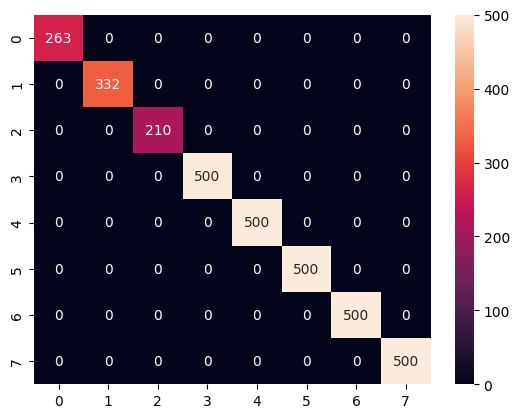

In [20]:
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

### Test set classifiction metrics

In [21]:
print('Accuracy: {:0.4f}'.format(accuracy_score(y_test, y_test_pred)))

Accuracy: 0.9355


In [22]:
print('Precision: {:0.4f}'.format(precision_score(y_test, y_test_pred, average='macro')))

Precision: 0.8100


In [23]:
print('Recall: {:0.4f}'.format(recall_score(y_test, y_test_pred, average='macro')))

Recall: 0.9429


In [24]:
print('F1-Score: {:0.4f}'.format(f1_score(y_test, y_test_pred, average='macro')))

F1-Score: 0.8527


In [25]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       0.91      1.00      0.95       113
           2       0.31      0.97      0.47       143
           3       0.81      0.92      0.86        90
           4       1.00      0.96      0.98     17628
           5       0.76      0.95      0.84      3248
           6       0.73      0.87      0.79      8266
           7       0.97      0.93      0.95     35183
           8       0.99      0.95      0.97     13650

    accuracy                           0.94     78321
   macro avg       0.81      0.94      0.85     78321
weighted avg       0.95      0.94      0.94     78321



In [26]:
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[  113,     0,     0,     0,     0,     0,     0,     0],
       [    0,   138,     1,     3,     0,     1,     0,     0],
       [    0,     5,    83,     1,     0,     1,     0,     0],
       [    0,   247,    16, 16861,   213,   135,   128,    28],
       [    0,     8,     1,    13,  3070,   103,     3,    50],
       [    0,    43,     0,    34,   222,  7190,   763,    14],
       [    0,     0,     0,     0,    10,  2352, 32821,     0],
       [   11,     0,     2,    19,   531,    72,    25, 12990]])

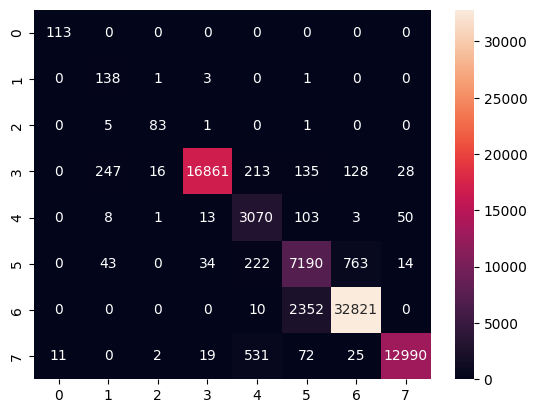

In [27]:
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

### Model ranking and hyperparameters

In [28]:
automl.leaderboard(detailed=True, ensemble_only=False)

,rank,ensemble_weight,type,cost,duration,config_id,train_loss,seed,start_time,end_time,budget,status,data_preprocessors,feature_preprocessors,balancing_strategy,config_origin
model_id,,,,,,,,,,,,,,,,
3,1,1.0,random_forest,0.065082,316.470647,2,0.000000,0,1.714481e+09,1.714482e+09,0.0,StatusType.SUCCESS,[],[no_preprocessing],weighting,Initial design
12,2,0.0,random_forest,0.069602,258.848044,11,0.002256,0,1.714483e+09,1.714483e+09,0.0,StatusType.SUCCESS,[],[no_preprocessing],weighting,Random Search
17,3,0.0,random_forest,0.070202,402.512675,16,0.000813,0,1.714483e+09,1.714484e+09,0.0,StatusType.SUCCESS,[],[no_preprocessing],none,Random Search
2,4,0.0,random_forest,0.070815,186.488303,1,0.000000,0,1.714481e+09,1.714481e+09,0.0,StatusType.SUCCESS,[],[no_preprocessing],none,Initial design
19,5,0.0,random_forest,0.071123,152.081416,18,0.001369,0,1.714484e+09,1.714484e+09,0.0,StatusType.SUCCESS,[],[no_preprocessing],none,Local Search
13,6,0.0,random_forest,0.076970,604.472307,12,0.004142,0,1.714483e+09,1.714483e+09,0.0,StatusType.SUCCESS,[],[no_preprocessing],none,Random Search (sorted)
16,7,0.0,random_forest,0.082362,133.035288,15,0.023934,0,1.714483e+09,1.714483e+09,0.0,StatusType.SUCCESS,[],[no_preprocessing],weighting,Random Search (sorted)
15,8,0.0,random_forest,0.085177,711.247635,14,0.016282,0,1.714483e+09,1.714484e+09,0.0,StatusType.SUCCESS,[],[no_preprocessing],weighting,Random Search
6,9,0.0,random_forest,0.086543,216.145253,5,0.036462,0,1.714482e+09,1.714482e+09,0.0,StatusType.SUCCESS,[],[no_preprocessing],weighting,Random Search (sorted)


In [29]:
automl.get_models_with_weights()

[(1.0,
  SimpleClassificationPipeline({'balancing:strategy': 'weighting', 'classifier:__choice__': 'random_forest', 'data_preprocessor:__choice__': 'feature_type', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:random_forest:bootstrap': 'False', 'classifier:random_forest:criterion': 'entropy', 'classifier:random_forest:max_depth': 'None', 'classifier:random_forest:max_features': 0.41808321658160696, 'classifier:random_forest:max_leaf_nodes': 'None', 'classifier:random_forest:min_impurity_decrease': 0.0, 'classifier:random_forest:min_samples_leaf': 1, 'classifier:random_forest:min_samples_split': 4, 'classifier:random_forest:min_weight_fraction_leaf': 0.0, 'data_preprocessor:feature_type:numerical_transformer:imputation:strategy': 'median', 'data_preprocessor:feature_type:numerical_transformer:rescaling:__choice__': 'standardize'},
  dataset_properties={
    'task': 2,
    'sparse': False,
    'multilabel': False,
    'multiclass': True,
    'target_type': 'classific

In [30]:
automl.show_models()

{3: {'model_id': 3,
  'rank': 1,
  'cost': 0.0650823200672867,
  'ensemble_weight': 1.0,
  'voting_model': VotingClassifier(estimators=None, voting='soft'),
  'estimators': [{'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice at 0x78848ccfece0>,
    'balancing': Balancing(random_state=1, strategy='weighting'),
    'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice at 0x78848af0b070>,
    'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice at 0x78848af08790>,
    'sklearn_classifier': RandomForestClassifier(bootstrap=False, criterion='entropy', max_features=5,
                           min_samples_split=4, n_estimators=512, n_jobs=1,
                           random_state=1, warm_start=True)},
   {'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice at 0x788474b1beb0>,
    'balancing': Balancing(random_state=1, strateg